## **Domicílios com rendimento per-capita de até 1 salário mínimo**

#### Este notebook apresenta a porcentagem de domicílio que vivem com uma renda de até um salário mínimo por morador, ordenado por município.

In [1]:
# Importar packages
from DadosAbertosBrasil import ibge
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#### 1. Preparar DataFrame

In [2]:
# Rodar SIDRA
data = ibge.Sidra()
data.agregado = 3261
data.variaveis = 1000096
data.periodos = 2010
data.localidades = {'N6': 'all'}
data.classificacoes = {386: [9692, 9681, 9682, 9683]}
res = data.rodar()

# Entrar no dicionário
dados = {}
for i in res[0]['resultados']:
    serie = list(i['classificacoes'][0]['categoria'].values())[0]
    dados[serie] = {}
    for j in range(len(i['series'])):
        nome = i['series'][j]['localidade']['nome']
        valor = i['series'][j]['serie']['2010']
        dados[serie][nome] = valor

# Formatar DataFrame
df = pd.DataFrame(dados).replace({'-': 0}).astype(float)
df['Mais de 1 salário mínimo'] = 100 - df.sum(axis=1)
df.sort_values('Mais de 1 salário mínimo', ascending=False, inplace=True)

display(df.sample(10))

,Sem rendimento,Até 1/4 de salário mínimo,Mais de 1/4 a 1/2 salário mínimo,Mais de 1/2 a 1 salário mínimo,Mais de 1 salário mínimo
São João do Piauí - PI,7.11,27.85,26.26,25.09,13.69
Flores do Piauí - PI,6.00,38.08,23.77,23.77,8.38
Carmo de Minas - MG,2.64,10.12,24.65,38.94,23.65
Leopoldina - MG,2.30,7.22,20.04,36.55,33.89
Pires Ferreira - CE,3.34,45.84,23.24,22.38,5.20
Pracuúba - AP,10.74,34.96,22.85,17.10,14.35
Honório Serpa - PR,3.13,14.68,23.96,32.84,25.39
São João del Rei - MG,1.75,4.70,16.32,36.39,40.84
Coivaras - PI,6.90,36.16,26.11,23.94,6.89
Córrego Novo - MG,3.11,18.05,31.09,35.91,11.84


In [3]:
# Top 20
top = df[:20].cumsum(axis=1)

# Bottom 20
bottom = df[-20:].cumsum(axis=1)

#### 2. Plottar gráfico

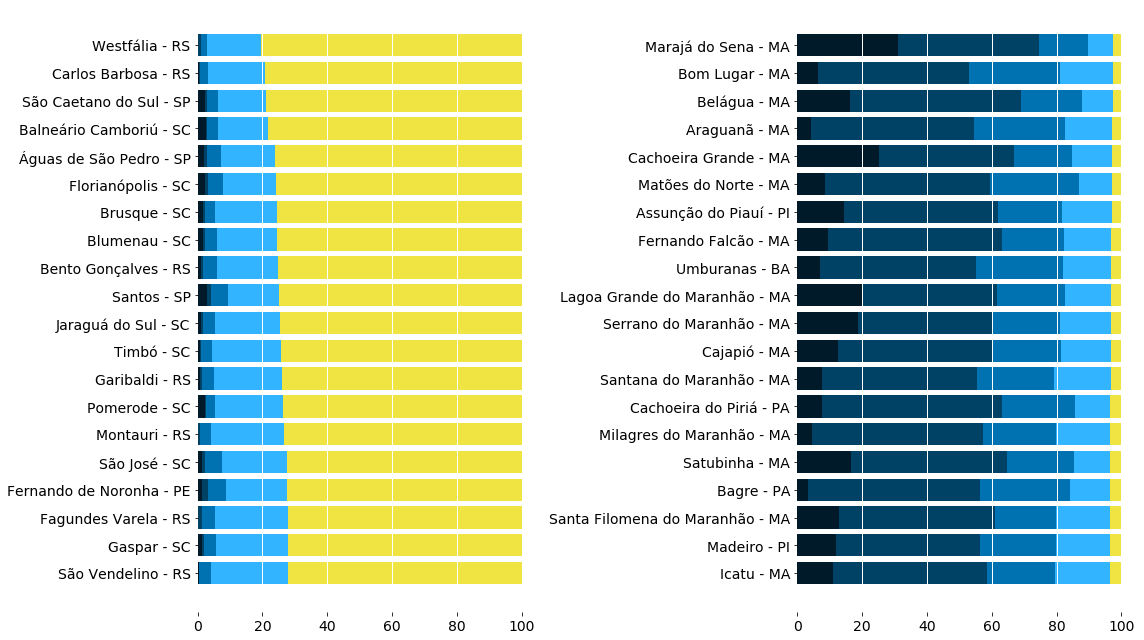

In [4]:
# Remover spines
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

# Escolher cores das categorias
colors = ['#F0E442', '#33B4FF', '#0072B2', '#004166', '#001A29']

# Criar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

# Plottar gráfico da esquerda
for col, color in zip(reversed(list(top.columns)), colors):
    ax1.barh(top.index, top[col], color=color)
ax1.invert_yaxis()
    
# Plottar gráfico da direita
for col, color in zip(reversed(list(top.columns)), colors):
    ax2.barh(bottom.index, bottom[col], color=color)

# Plottar linhas verticais de referência
for line in range(20,81,20):
    ax1.axvline(line, c='white', lw=1)
    ax2.axvline(line, c='white', lw=1)
   
# Alterar tamanho da fonte
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Formatar margens
fig.tight_layout()